In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import datasets, linear_model, metrics

%matplotlib inline

## Import Data and Cleaned Data

In [2]:
df=pd.read_csv('Cleaned Apartment Data.csv')
df

,Unnamed: 0,URL,Unit_ID,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,...,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice,FurnishedNew
0,0,https://jendela360.com/sewa-apartemen-tamansar...,tssb011,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,...,1,1,1,1,1,1,1,23,96000000,Full
1,1,https://jendela360.com/sewa-apartemen-puri-par...,ppvc072,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,...,0,1,1,1,0,1,1,19,30000000,Semi
2,2,https://jendela360.com/sewa-apartemen-metro-pa...,mprc040,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,...,0,1,1,1,0,1,1,22,70000000,Full
3,3,https://jendela360.com/sewa-apartemen-pondok-i...,ponf003,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,...,1,1,1,1,1,1,1,24,576000000,Full
4,4,https://jendela360.com/sewa-apartemen-season-c...,sscc039,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,...,0,1,1,0,0,1,1,15,32000000,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,5142,https://jendela360.com/sewa-apartemen-grand-ce...,gcpc003,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,...,0,0,0,0,0,0,1,14,36000000,Full
5143,5143,https://jendela360.com/sewa-apartemen-rosevill...,rsva003,0,1,BSD City,Tangerang,106.664000,-6.294400,1,...,0,1,1,0,0,0,1,16,60000000,Full
5144,5144,https://jendela360.com/sewa-apartemen-setiabud...,sbrc003,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,...,0,1,1,1,0,1,1,21,250000000,Full
5145,5145,https://jendela360.com/sewa-apartemen-semanggi...,apsc002,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,...,1,1,1,1,1,1,1,24,108000000,Full


In [3]:
## House Price Data length
print(df.shape)

(5147, 38)


In [4]:
## First 5 rows
df.head()

,Unnamed: 0,URL,Unit_ID,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,...,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice,FurnishedNew
0,0,https://jendela360.com/sewa-apartemen-tamansar...,tssb011,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,...,1,1,1,1,1,1,1,23,96000000,Full
1,1,https://jendela360.com/sewa-apartemen-puri-par...,ppvc072,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,...,0,1,1,1,0,1,1,19,30000000,Semi
2,2,https://jendela360.com/sewa-apartemen-metro-pa...,mprc040,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,...,0,1,1,1,0,1,1,22,70000000,Full
3,3,https://jendela360.com/sewa-apartemen-pondok-i...,ponf003,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,...,1,1,1,1,1,1,1,24,576000000,Full
4,4,https://jendela360.com/sewa-apartemen-season-c...,sscc039,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,...,0,1,1,0,0,1,1,15,32000000,Non


In [5]:
## Cek Summary Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5147 entries, 0 to 5146
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5147 non-null   int64  
 1   URL                5147 non-null   object 
 2   Unit_ID            5147 non-null   object 
 3   No_Rooms           5147 non-null   int64  
 4   Bathroom           5147 non-null   int64  
 5   Locality           5147 non-null   object 
 6   Region             5147 non-null   object 
 7   Longitude          5147 non-null   float64
 8   Latitude           5147 non-null   float64
 9   Furnished          5147 non-null   int64  
 10  Area               5147 non-null   float64
 11  AC                 5147 non-null   int64  
 12  Water_Heater       5147 non-null   int64  
 13  Dining_Set         5147 non-null   int64  
 14  Electricity        5147 non-null   int64  
 15  Bed                5147 non-null   int64  
 16  Access_Card        5147 

In [6]:
#Drop Columns
df1 = df.drop(['Unnamed: 0', 'URL', 'Unit_ID', 'FurnishedNew'], axis = 'columns')
df1

,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,AC,Water_Heater,...,Security,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice
0,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,1,1,...,1,1,1,1,1,1,1,1,23,96000000
1,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,1,0,...,1,0,1,1,1,0,1,1,19,30000000
2,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,1,1,...,1,0,1,1,1,0,1,1,22,70000000
3,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,1,1,...,1,1,1,1,1,1,1,1,24,576000000
4,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,1,0,...,1,0,1,1,0,0,1,1,15,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5142,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,1,0,...,0,0,0,0,0,0,0,1,14,36000000
5143,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,1,1,...,1,0,1,1,0,0,0,1,16,60000000
5144,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,1,1,...,1,0,1,1,1,0,1,1,21,250000000
5145,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,1,1,...,1,1,1,1,1,1,1,1,24,108000000


In [7]:
#dataframe baru
df_apart = df1[['No_Rooms', 'Bathroom', 'Longitude', 'Latitude', 'Area', 'Total_Facilities', 'AnnualPrice']]
df_apart.head()

,No_Rooms,Bathroom,Longitude,Latitude,Area,Total_Facilities,AnnualPrice
0,1,1,106.819159,-6.226598,43.0,23,96000000
1,2,1,106.756061,-6.192081,35.0,19,30000000
2,2,1,106.757651,-6.186415,53.0,22,70000000
3,2,2,106.784600,-6.272637,85.0,24,576000000
4,2,1,106.796056,-6.153652,48.0,15,32000000


In [8]:
#Statistics of Numerical Columns
df_apart.describe()

,No_Rooms,Bathroom,Longitude,Latitude,Area,Total_Facilities,AnnualPrice
count,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5147.000000,5.147000e+03
mean,1.523023,1.247329,106.811967,-6.206232,57.313818,19.510783,1.022502e+08
std,0.947722,0.512220,0.066255,0.047688,37.010975,3.782160,9.350284e+07
min,0.000000,0.000000,106.586901,-6.564600,20.340000,1.000000,1.200000e+07
25%,1.000000,1.000000,106.784532,-6.232826,33.000000,18.000000,4.300000e+07
50%,2.000000,1.000000,106.816842,-6.197352,43.000000,20.000000,6.500000e+07
75%,2.000000,1.000000,106.851836,-6.175894,73.000000,22.000000,1.270500e+08
max,4.000000,5.000000,107.176300,-6.092000,249.000000,24.000000,7.056000e+08


In [9]:
df1['Region'].unique()

array(['Jakarta Selatan', 'Jakarta Barat', 'Jakarta Pusat',
       'Jakarta Utara', 'Jakarta Timur', 'Depok', 'Tangerang', 'Bekasi',
       'Bogor'], dtype=object)

## Exploratory Data Analysis

In [10]:
#Check Duplicate
df1.duplicated().sum()

532

In [11]:
df1.drop_duplicates(inplace = True)
df1

,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,AC,Water_Heater,...,Security,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice
0,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,1,1,...,1,1,1,1,1,1,1,1,23,96000000
1,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,1,0,...,1,0,1,1,1,0,1,1,19,30000000
2,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,1,1,...,1,0,1,1,1,0,1,1,22,70000000
3,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,1,1,...,1,1,1,1,1,1,1,1,24,576000000
4,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,1,0,...,1,0,1,1,0,0,1,1,15,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,2,2,Senayan,Jakarta Selatan,106.794123,-6.222613,1,90.0,1,1,...,1,0,1,1,0,0,1,1,20,309000000
5142,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,1,0,...,0,0,0,0,0,0,0,1,14,36000000
5144,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,1,1,...,1,0,1,1,1,0,1,1,21,250000000
5145,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,1,1,...,1,1,1,1,1,1,1,1,24,108000000


In [12]:
#Check Outlier
df1[(np.abs(stats.zscore(df1["AnnualPrice"])) >= 3)]

,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,AC,Water_Heater,...,Security,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice
3,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,1,1,...,1,1,1,1,1,1,1,1,24,576000000
52,3,2,Sudirman,Jakarta Selatan,106.805571,-6.226071,1,175.0,1,1,...,1,0,1,1,0,0,1,1,21,405000000
125,3,2,Senayan,Jakarta Selatan,106.794123,-6.222613,1,155.0,1,1,...,1,0,1,1,0,0,1,1,21,390600000
126,3,3,Sudirman,Jakarta Pusat,106.818351,-6.208956,0,200.0,1,1,...,1,0,1,1,1,0,1,1,18,480000000
187,3,3,Gandaria,Jakarta Selatan,106.787499,-6.246040,1,177.0,1,1,...,1,1,1,1,1,1,0,1,23,540000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,3,1,Bendungan Hilir,Jakarta Pusat,106.816300,-6.215600,1,73.0,1,1,...,0,0,0,0,0,0,0,0,10,515970000
4688,2,1,Pancoran,Jakarta Selatan,106.845254,-6.242801,0,102.0,1,0,...,1,0,1,1,1,0,1,1,14,420000000
4811,2,2,Menteng,Jakarta Pusat,106.838297,-6.196708,1,115.0,1,1,...,1,0,1,1,0,0,0,0,14,415000000
4981,3,3,Puri Indah,Jakarta Barat,106.738730,-6.190723,0,107.0,0,0,...,1,1,1,1,1,1,1,1,16,450000000


In [13]:
df1 = df1[(np.abs(stats.zscore(df1["AnnualPrice"])) < 3)]
df1

,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,AC,Water_Heater,...,Security,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice
0,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,1,1,...,1,1,1,1,1,1,1,1,23,96000000
1,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,1,0,...,1,0,1,1,1,0,1,1,19,30000000
2,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,1,1,...,1,0,1,1,1,0,1,1,22,70000000
4,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,1,0,...,1,0,1,1,0,0,1,1,15,32000000
5,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,1,0,...,1,0,1,1,1,1,1,1,21,60000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,2,2,Senayan,Jakarta Selatan,106.794123,-6.222613,1,90.0,1,1,...,1,0,1,1,0,0,1,1,20,309000000
5142,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,1,0,...,0,0,0,0,0,0,0,1,14,36000000
5144,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,1,1,...,1,0,1,1,1,0,1,1,21,250000000
5145,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,1,1,...,1,1,1,1,1,1,1,1,24,108000000


In [14]:
df1 = df1.reset_index(drop=True)
df1

,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,AC,Water_Heater,...,Security,Basketball,Multipurpose_Room,Gym,Jogging,Tennis,Restaurant,Playground,Total_Facilities,AnnualPrice
0,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,1,1,...,1,1,1,1,1,1,1,1,23,96000000
1,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,1,0,...,1,0,1,1,1,0,1,1,19,30000000
2,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,1,1,...,1,0,1,1,1,0,1,1,22,70000000
3,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,1,0,...,1,0,1,1,0,0,1,1,15,32000000
4,2,1,Cempaka Putih,Jakarta Pusat,106.873191,-6.187929,1,33.0,1,0,...,1,0,1,1,1,1,1,1,21,60000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,2,2,Senayan,Jakarta Selatan,106.794123,-6.222613,1,90.0,1,1,...,1,0,1,1,0,0,1,1,20,309000000
4504,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,1,0,...,0,0,0,0,0,0,0,1,14,36000000
4505,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,1,1,...,1,0,1,1,1,0,1,1,21,250000000
4506,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,1,1,...,1,1,1,1,1,1,1,1,24,108000000


## EDA

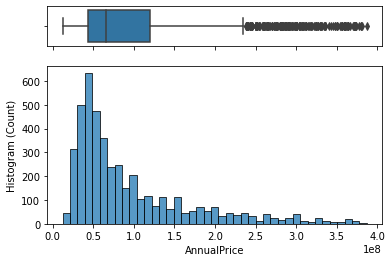

In [15]:
#Visualisasi
def vis_univar(data, column):
    sns.color_palette("pastel")
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {'height_ratios':(.2, .8)})
    
    sns.boxplot(data = df1, x = column, ax = ax_box)
    sns.histplot(data = df1, x = column, ax = ax_hist)
    
    ax_box.set(xlabel = '')
    ax_hist.set(ylabel = 'Histogram (Count)')
    
    plt.show()

vis_univar(df1, 'AnnualPrice')

Text(0.5, 1.0, 'Annual Price vs Area')

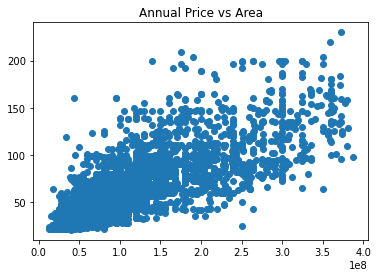

In [16]:
plt.scatter(df1.AnnualPrice,df1.Area)
plt.title("Annual Price vs Area")

## Coba baru

In [60]:
apart = df1[['No_Rooms', 'Bathroom', 'Region', 'Longitude', 'Latitude', 'Furnished', 'Area', 'Total_Facilities', 'AnnualPrice']]
apart.head()

,No_Rooms,Bathroom,Region,Longitude,Latitude,Furnished,Area,Total_Facilities,AnnualPrice
0,1,1,Jakarta Selatan,106.819159,-6.226598,1,43.0,23,96000000
1,2,1,Jakarta Barat,106.756061,-6.192081,0,35.0,19,30000000
2,2,1,Jakarta Barat,106.757651,-6.186415,1,53.0,22,70000000
3,2,1,Jakarta Barat,106.796056,-6.153652,0,48.0,15,32000000
4,2,1,Jakarta Pusat,106.873191,-6.187929,1,33.0,21,60000000


In [61]:
#Correlation
apart.corr('pearson')

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,AnnualPrice
No_Rooms,1.000000,0.502711,0.131265,0.100371,0.034336,0.631541,0.210498,0.432208
Bathroom,0.502711,1.000000,-0.021129,-0.029449,0.040380,0.743132,0.144771,0.603478
Longitude,0.131265,-0.021129,1.000000,-0.015406,0.099458,-0.000600,0.123611,0.018143
Latitude,0.100371,-0.029449,-0.015406,1.000000,-0.172414,-0.000665,0.027103,-0.171597
Furnished,0.034336,0.040380,0.099458,-0.172414,1.000000,0.063800,0.428716,0.214866
Area,0.631541,0.743132,-0.000600,-0.000665,0.063800,1.000000,0.242708,0.809834
Total_Facilities,0.210498,0.144771,0.123611,0.027103,0.428716,0.242708,1.000000,0.307532
AnnualPrice,0.432208,0.603478,0.018143,-0.171597,0.214866,0.809834,0.307532,1.000000


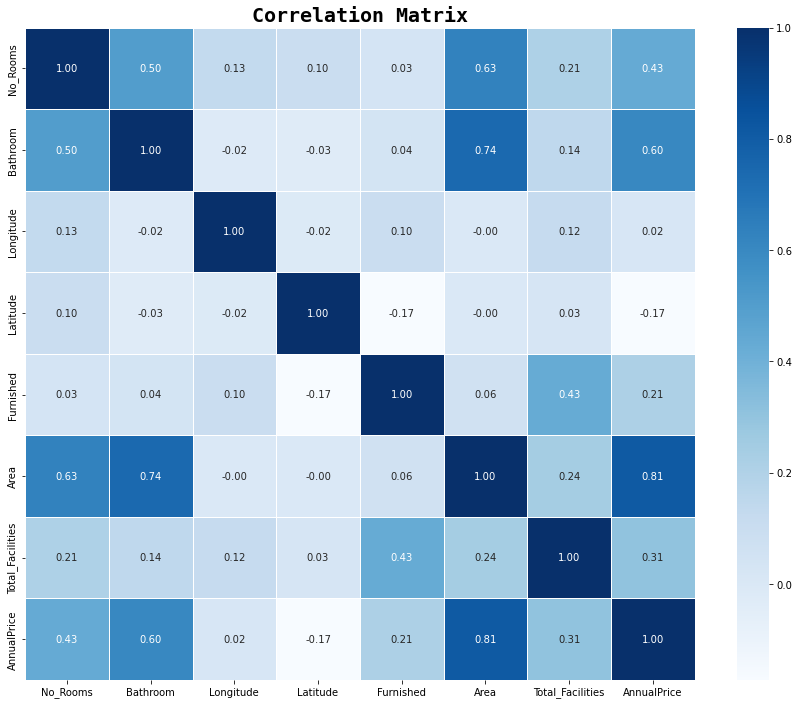

In [62]:
#heatmap
plt.figure(figsize = (15, 12))
corr = apart.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, annot=True, cmap='Blues', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix',size=20, fontweight='bold', fontfamily='monospace')
plt.show()

In [96]:
#One hot encoding
apart_final = pd.get_dummies(apart, drop_first=True)
apart_final.head()

,No_Rooms,Bathroom,Longitude,Latitude,Furnished,Area,Total_Facilities,AnnualPrice,Region_Bogor,Region_Depok,Region_Jakarta Barat,Region_Jakarta Pusat,Region_Jakarta Selatan,Region_Jakarta Timur,Region_Jakarta Utara,Region_Tangerang
0,1,1,106.819159,-6.226598,1,43.0,23,96000000,0,0,0,0,1,0,0,0
1,2,1,106.756061,-6.192081,0,35.0,19,30000000,0,0,1,0,0,0,0,0
2,2,1,106.757651,-6.186415,1,53.0,22,70000000,0,0,1,0,0,0,0,0
3,2,1,106.796056,-6.153652,0,48.0,15,32000000,0,0,1,0,0,0,0,0
4,2,1,106.873191,-6.187929,1,33.0,21,60000000,0,0,0,1,0,0,0,0


In [97]:
x = apart_final.drop(['AnnualPrice'], axis = 1)
y = apart_final['AnnualPrice']

In [98]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=10)
# summarize
print('Train', x_train.shape, y_train.shape)
print('Test', x_test.shape, y_test.shape)

Train (4057, 15) (4057,)
Test (451, 15) (451,)


In [99]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(x_train, y_train)
 
# regression coefficients
print('Coefficients    : ', reg.coef_)

# regression intercept
print('Intercept       : ', reg.intercept_)


Coefficients    :  [-7.68235975e+06  2.39847399e+06 -1.43990775e+08 -1.35095690e+08
  2.20092185e+07  1.71713356e+06  1.00251407e+05 -5.95592477e+07
 -4.16654523e+07 -2.51172670e+07  7.20049219e+06  1.53752756e+07
 -6.92935493e+06 -1.84764282e+07 -4.91474697e+07]
Intercept       :  14535317873.534794


In [100]:
intercept =['%.4f'% reg.intercept_]
intercept

['14535317873.5348']

In [101]:
coef =['%.4f'% i for i in reg.coef_]
coef

['-7682359.7509',
 '2398473.9892',
 '-143990775.4994',
 '-135095689.9129',
 '22009218.5267',
 '1717133.5642',
 '100251.4069',
 '-59559247.7367',
 '-41665452.3254',
 '-25117267.0251',
 '7200492.1875',
 '15375275.6308',
 '-6929354.9266',
 '-18476428.1537',
 '-49147469.6662']

In [102]:
features = pd.DataFrame(reg.coef_, x.columns, columns=['Coefficients'])
features

,Coefficients
No_Rooms,-7.682360e+06
Bathroom,2.398474e+06
Longitude,-1.439908e+08
Latitude,-1.350957e+08
Furnished,2.200922e+07
Area,1.717134e+06
Total_Facilities,1.002514e+05
Region_Bogor,-5.955925e+07
Region_Depok,-4.166545e+07
Region_Jakarta Barat,-2.511727e+07


In [103]:
y_pred = reg.predict(x_test)

In [104]:
# MAE
from sklearn.metrics import mean_absolute_error
print ("MAE        : ",mean_absolute_error(y_test,y_pred))
# MSE
from sklearn.metrics import mean_squared_error
print ("MSE        : ",mean_squared_error(y_test,y_pred))
# RMSE
from sklearn.metrics import mean_squared_error
print ("RMSE       : ",np.sqrt(mean_squared_error(y_test,y_pred)))
# R2
from sklearn.metrics import r2_score
print ("R2         : ",r2_score(y_test,y_pred))
# ADJ R2
print ("Adjusted R2: ",1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1))

MAE        :  24119467.71555492
MSE        :  1338904936400577.0
RMSE       :  36591049.94941491
R2         :  0.7865450406140875
Adjusted R2:  0.7858322569117748


Feature 0: 956.512500
Feature 1: 2430.624804
Feature 2: 1.405597
Feature 3: 127.596227
Feature 4: 208.768290
Feature 5: 7643.102132
Feature 6: 462.590527
Feature 7: 0.733753
Feature 8: 30.542320
Feature 9: 150.202693
Feature 10: 14.042724
Feature 11: 975.475864
Feature 12: 108.530634
Feature 13: 66.395582
Feature 14: 111.446138


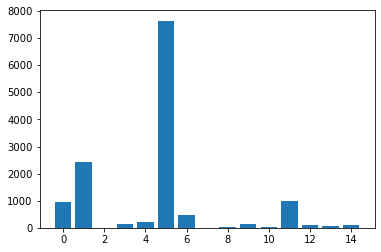

In [47]:
# example of correlation feature selection for numerical data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	x_train_fs = fs.transform(x_train)
	# transform test input data
	x_test_fs = fs.transform(x_test)
	return x_train_fs, x_test_fs, fs

# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [68]:
# evaluation of a model using 10 features chosen with correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=14)
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	x_train_fs = fs.transform(x_train)
	# transform test input data
	x_test_fs = fs.transform(x_test)
	return x_train_fs, x_test_fs, fs

# feature selection
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# fit the model
model = LinearRegression()
model.fit(x_train_fs, y_train)
# evaluate the model
yhat = model.predict(x_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 22377996.328


In [69]:
22382513.15702978

22382513.15702978

Feature: 0, Score: -7206269.71125
Feature: 1, Score: 1200578.19786
Feature: 2, Score: -138323834.44925
Feature: 3, Score: -142910132.55254
Feature: 4, Score: 21368803.45474
Feature: 5, Score: 1631549.64293
Feature: 6, Score: 114489.85462
Feature: 7, Score: -60583367.48094
Feature: 8, Score: -41781466.07255
Feature: 9, Score: -21488370.31989
Feature: 10, Score: 9335037.77531
Feature: 11, Score: 14333231.06351
Feature: 12, Score: -6059602.05678
Feature: 13, Score: -14304391.51394
Feature: 14, Score: -47578504.80283


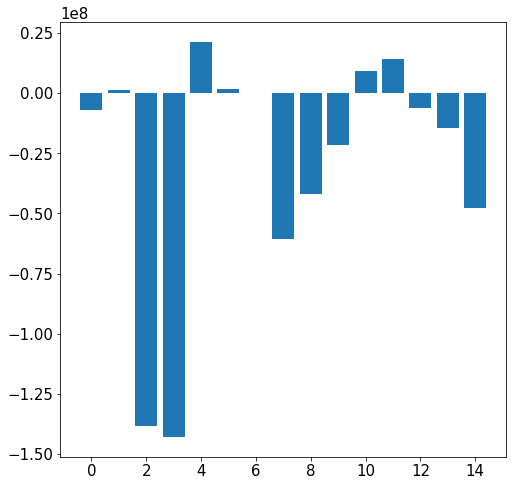

In [70]:
from matplotlib import pyplot
# get importance
importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Setelah dibuang

In [71]:
apart_fix = df1[['No_Rooms', 'Bathroom', 'Region', 'Area', 'Total_Facilities', 'AnnualPrice']]
apart_fix.head()

,No_Rooms,Bathroom,Region,Area,Total_Facilities,AnnualPrice
0,1,1,Jakarta Selatan,43.0,23,96000000
1,2,1,Jakarta Barat,35.0,19,30000000
2,2,1,Jakarta Barat,53.0,22,70000000
3,2,1,Jakarta Barat,48.0,15,32000000
4,2,1,Jakarta Pusat,33.0,21,60000000


In [72]:
#One hot encoding
apart_final1 = pd.get_dummies(apart_fix, drop_first=True)
apart_final1.head()

,No_Rooms,Bathroom,Area,Total_Facilities,AnnualPrice,Region_Bogor,Region_Depok,Region_Jakarta Barat,Region_Jakarta Pusat,Region_Jakarta Selatan,Region_Jakarta Timur,Region_Jakarta Utara,Region_Tangerang
0,1,1,43.0,23,96000000,0,0,0,0,1,0,0,0
1,2,1,35.0,19,30000000,0,0,1,0,0,0,0,0
2,2,1,53.0,22,70000000,0,0,1,0,0,0,0,0
3,2,1,48.0,15,32000000,0,0,1,0,0,0,0,0
4,2,1,33.0,21,60000000,0,0,0,1,0,0,0,0


In [73]:
x = apart_final1.drop(['AnnualPrice'], axis = 1)
y = apart_final1['AnnualPrice']

In [74]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [75]:
 # create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(x_train, y_train)
 
# regression coefficients
print('Coefficients    : ', reg.coef_)

# regression intercept
print('Intercept       : ', reg.intercept_)


Coefficients    :  [ -8541679.59624737   2314886.88004823   1636706.95996005
   1066122.27883606  14709398.02876244     96254.70033608
  -4134804.4114004   17699216.05479136  35753053.56081818
   3421119.36684216 -13772097.85451225  -4284165.72910423]
Intercept       :  -20532825.627868727


In [76]:
y_pred = reg.predict(x_test)

In [77]:
# MAE
from sklearn.metrics import mean_absolute_error
print ("MAE        : ",mean_absolute_error(y_test,y_pred))
# MSE
from sklearn.metrics import mean_squared_error
print ("MSE        : ",mean_squared_error(y_test,y_pred))
# RMSE
from sklearn.metrics import mean_squared_error
print ("RMSE       : ",np.sqrt(mean_squared_error(y_test,y_pred)))
# R2
from sklearn.metrics import r2_score
print ("R2         : ",r2_score(y_test,y_pred))
# ADJ R2
print ("Adjusted R2: ",1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1))

MAE        :  23603044.542319536
MSE        :  1273992214082609.5
RMSE       :  35693027.527552344
R2         :  0.7062187774528075
Adjusted R2:  0.7054188285826994


## EDA BARU

In [78]:
new_df=df1['Region'].value_counts().rename_axis('Region_of_Apartment').reset_index(name='Counts')
new_df.head()

,Region_of_Apartment,Counts
0,Jakarta Selatan,1210
1,Jakarta Barat,1148
2,Jakarta Pusat,941
3,Jakarta Utara,351
4,Jakarta Timur,329


In [79]:
your_lables=new_df.Region_of_Apartment
your_values=new_df.Counts
your_explode=[0.1,0.1,0.1,0,0,0,0,0,0]

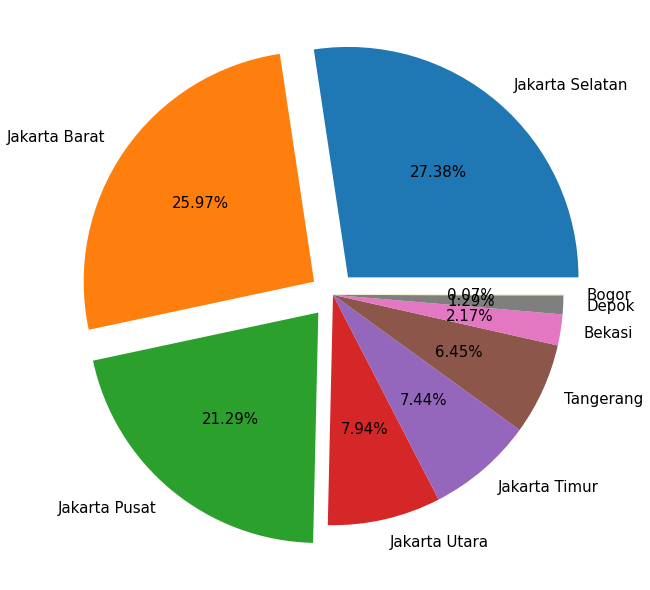

In [81]:
fig = plt.figure()
sns.color_palette("pastel")
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['font.size'] = 15
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(your_values, labels=your_lables, autopct='%1.2f%%', explode=your_explode)
plt.show()

In [164]:
new_df=df1.groupby('Region').mean()['AnnualPrice'].sort_values(ascending=False).rename_axis('Region_of_Apartment').reset_index(name='Average_of_Annual_Price')
new_df.head()

,Region_of_Apartment,Average_of_Annual_Price
0,Jakarta Selatan,1.470265e+08
1,Jakarta Pusat,1.029429e+08
2,Jakarta Barat,7.133230e+07
3,Jakarta Utara,6.295185e+07
4,Bogor,5.833333e+07


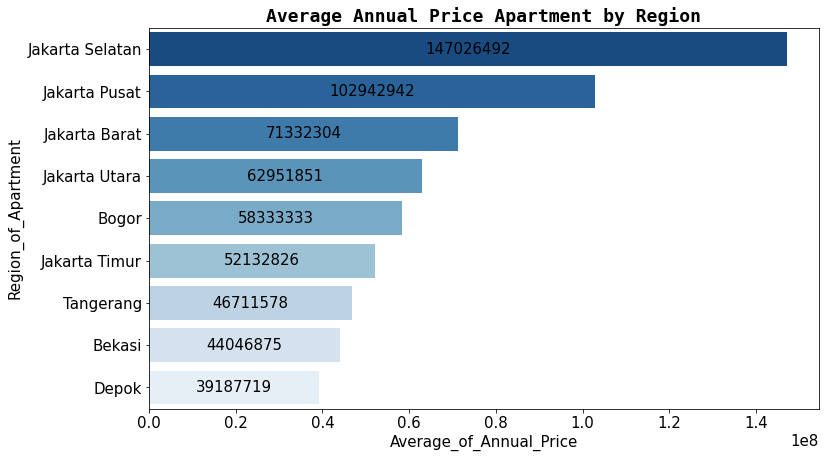

In [165]:
your_lables=new_df.Region_of_Apartment
your_values=new_df.Average_of_Annual_Price
fig = plt.figure(figsize=(12,7))
ax=sns.barplot(x=your_values, y=your_lables, palette="Blues_r")
ax.bar_label(ax.containers[0],fmt='%d',label_type='center')
plt.title("Average Annual Price Apartment by Region" , size=18, fontweight='bold', fontfamily='monospace')
plt.show()

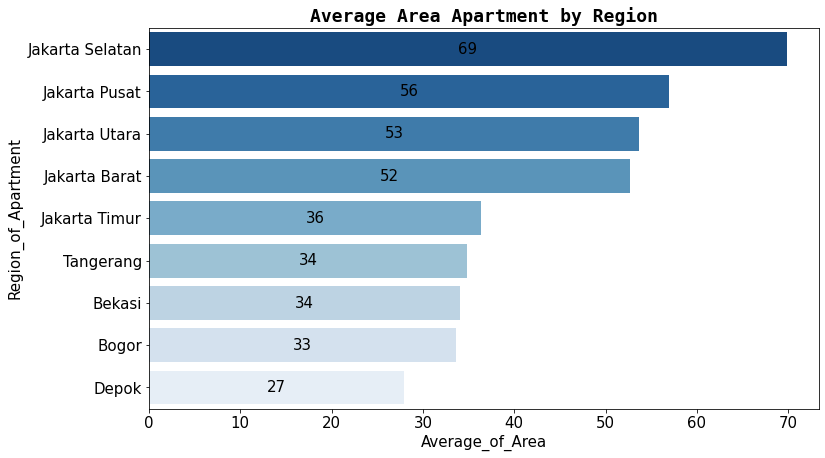

In [166]:
new_df=df1.groupby('Region').mean()['Area'].sort_values(ascending=False).rename_axis('Region_of_Apartment').
    
    reset_index(name='Average_of_Area')
new_df.head()
your_lables=new_df.Region_of_Apartment
your_values=new_df.Average_of_Area
fig = plt.figure(figsize=(12,7))
ax=sns.barplot(x=your_values, y=your_lables, palette="Blues_r")
ax.bar_label(ax.containers[0],fmt='%d',label_type='center')
plt.title("Average Area Apartment by Region" , size=18, fontweight='bold', fontfamily='monospace')
plt.show()

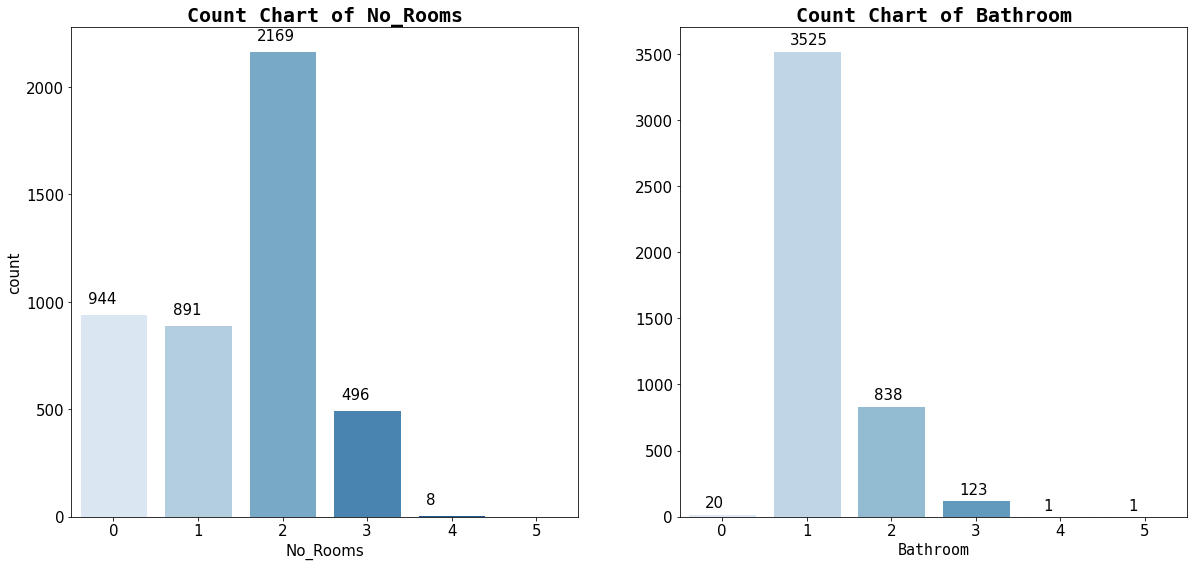

In [248]:
#visualisasi
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,9))

sns.countplot(ax=axes[0], data = df1 , x = "No_Rooms" , palette="Blues", edgecolor='w')
axes[0].set_title('Count Chart of No_Rooms', size=20, fontweight='bold', fontfamily='monospace')
for p in axes[0].patches:
        axes[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.xlabel("No Rooms", size=15, fontweight='light', fontfamily='monospace')
plt.ylabel('')

sns.countplot(ax=axes[1], data = df1 , x = "Bathroom" , palette="Blues", edgecolor='w')
axes[1].set_title('Count Chart of Bathroom', size=20, fontweight='bold', fontfamily='monospace')
for p in axes[1].patches:
        axes[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+50))
plt.xlabel("Bathroom", size=15, fontweight='light', fontfamily='monospace')
plt.ylabel('')


plt.show()

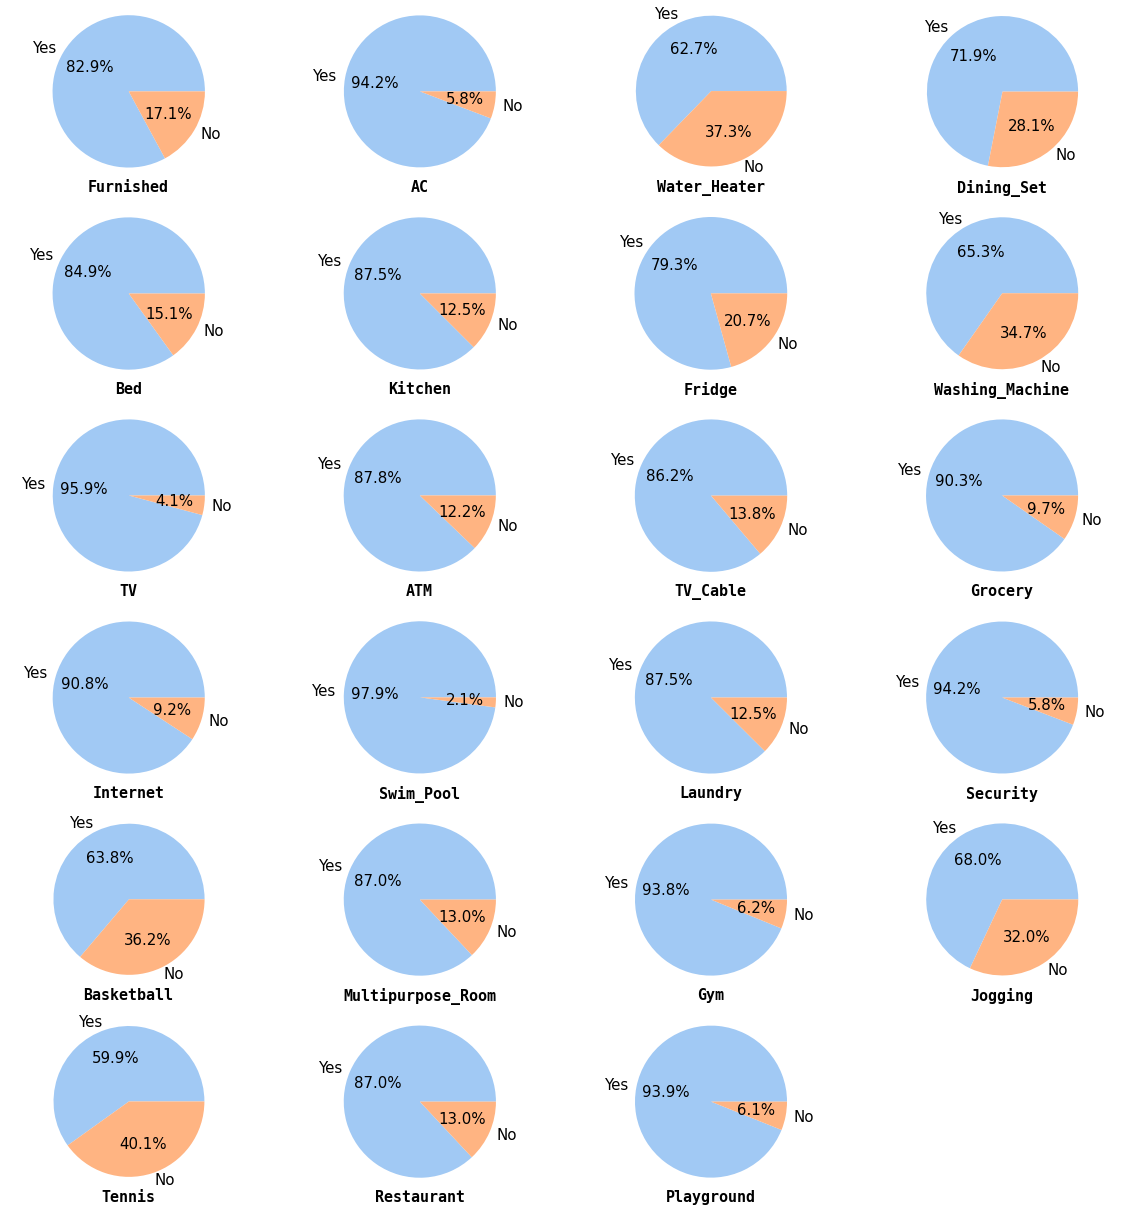

In [266]:
categorical_cols = ['Furnished', 'AC', 'Water_Heater', 'Dining_Set', 'Bed', 'Kitchen', 'Fridge', 
                    'Washing_Machine', 'TV', 'ATM', 'TV_Cable', 'Grocery', 'Internet', 'Swim_Pool', 
                    'Laundry', 'Security', 'Basketball', 'Multipurpose_Room', 'Gym', 
                    'Jogging', 'Tennis','Restaurant', 'Playground']
i = 1
plt.rcParams['font.size'] = 15
plt.figure(figsize = (20,70))
for col in categorical_cols:
    table = df1[col].value_counts()
    labels = 'Yes', 'No'
    plt.subplot(19,4,i)
    i = i + 1
    ax = table.plot.pie(labels=labels, autopct='%1.1f%%')
    ax.axis('equal')
    ax.set_xlabel(col, size=15, fontweight='bold', fontfamily='monospace')
    ax.set_ylabel('')